## Data exploration

### 1. Aperçu des données : 

In [3]:
import pandas as pd

# Chargement du fichier CSV
df = pd.read_csv("CheXpert-v1.0-small/train.csv")  # adapte le nom si nécessaire

# Aperçu des données
print(df.shape)
print(df.head())
print(df.info())


(223414, 19)
                                                Path     Sex  Age  \
0  CheXpert-v1.0-small/train/patient00001/study1/...  Female   68   
1  CheXpert-v1.0-small/train/patient00002/study2/...  Female   87   
2  CheXpert-v1.0-small/train/patient00002/study1/...  Female   83   
3  CheXpert-v1.0-small/train/patient00002/study1/...  Female   83   
4  CheXpert-v1.0-small/train/patient00003/study1/...    Male   41   

  Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  Cardiomegaly  \
0         Frontal    AP         1.0                         NaN           NaN   
1         Frontal    AP         NaN                         NaN          -1.0   
2         Frontal    AP         NaN                         NaN           NaN   
3         Lateral   NaN         NaN                         NaN           NaN   
4         Frontal    AP         NaN                         NaN           NaN   

   Lung Opacity  Lung Lesion  Edema  Consolidation  Pneumonia  Atelectasis  \
0      

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Support Devices'),
  Text(1, 0, 'Lung Opacity'),
  Text(2, 0, 'Pleural Effusion'),
  Text(3, 0, 'Edema'),
  Text(4, 0, 'Atelectasis'),
  Text(5, 0, 'Cardiomegaly'),
  Text(6, 0, 'No Finding'),
  Text(7, 0, 'Pneumothorax'),
  Text(8, 0, 'Consolidation'),
  Text(9, 0, 'Enlarged Cardiomediastinum'),
  Text(10, 0, 'Lung Lesion'),
  Text(11, 0, 'Fracture'),
  Text(12, 0, 'Pneumonia'),
  Text(13, 0, 'Pleural Other')])

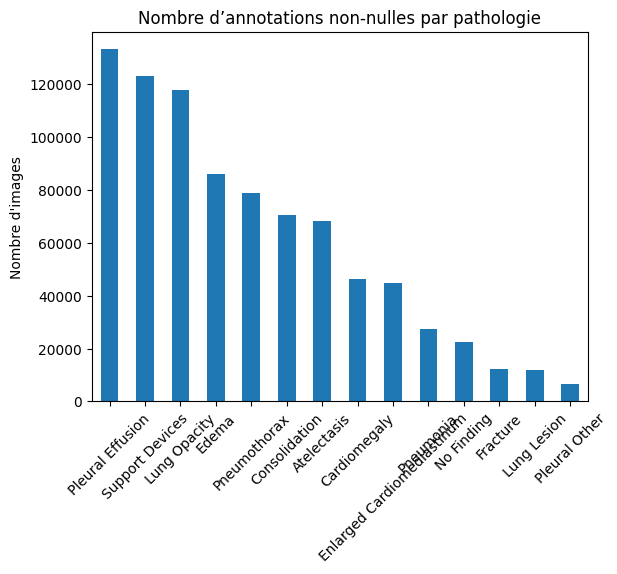

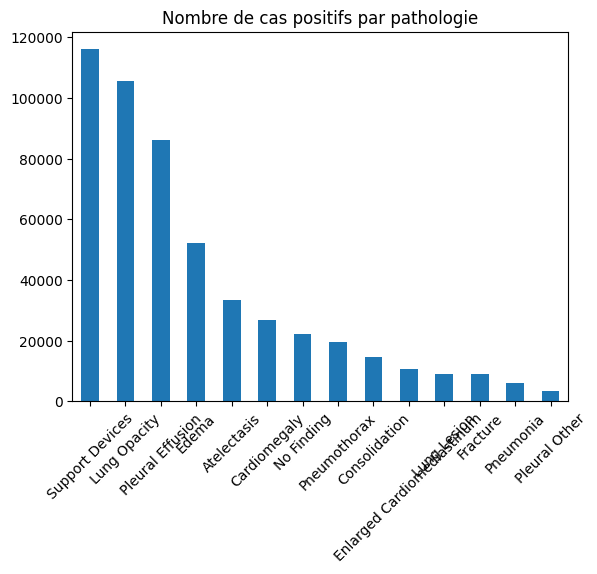

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Colonnes de pathologie
pathology_cols = df.columns[5:]  # à partir de 'No Finding'

# Compte des cas pour chaque pathologie
plt.figure()
df[pathology_cols].notna().sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Nombre d’annotations non-nulles par pathologie')
plt.ylabel("Nombre d'images")
plt.xticks(rotation=45)

# Présence (1.0) des pathologies
plt.figure()
df[pathology_cols].apply(lambda x: (x == 1.0).sum()).sort_values(ascending=False).plot(kind='bar')
plt.title('Nombre de cas positifs par pathologie')
plt.xticks(rotation=45)


/tmp/ipykernel_336158/2209903559.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  co_matrix = df[pathology_cols].applymap(lambda x: 1 if x == 1.0 else 0).corr()


Text(0.5, 1.0, 'Corrélation entre pathologies')

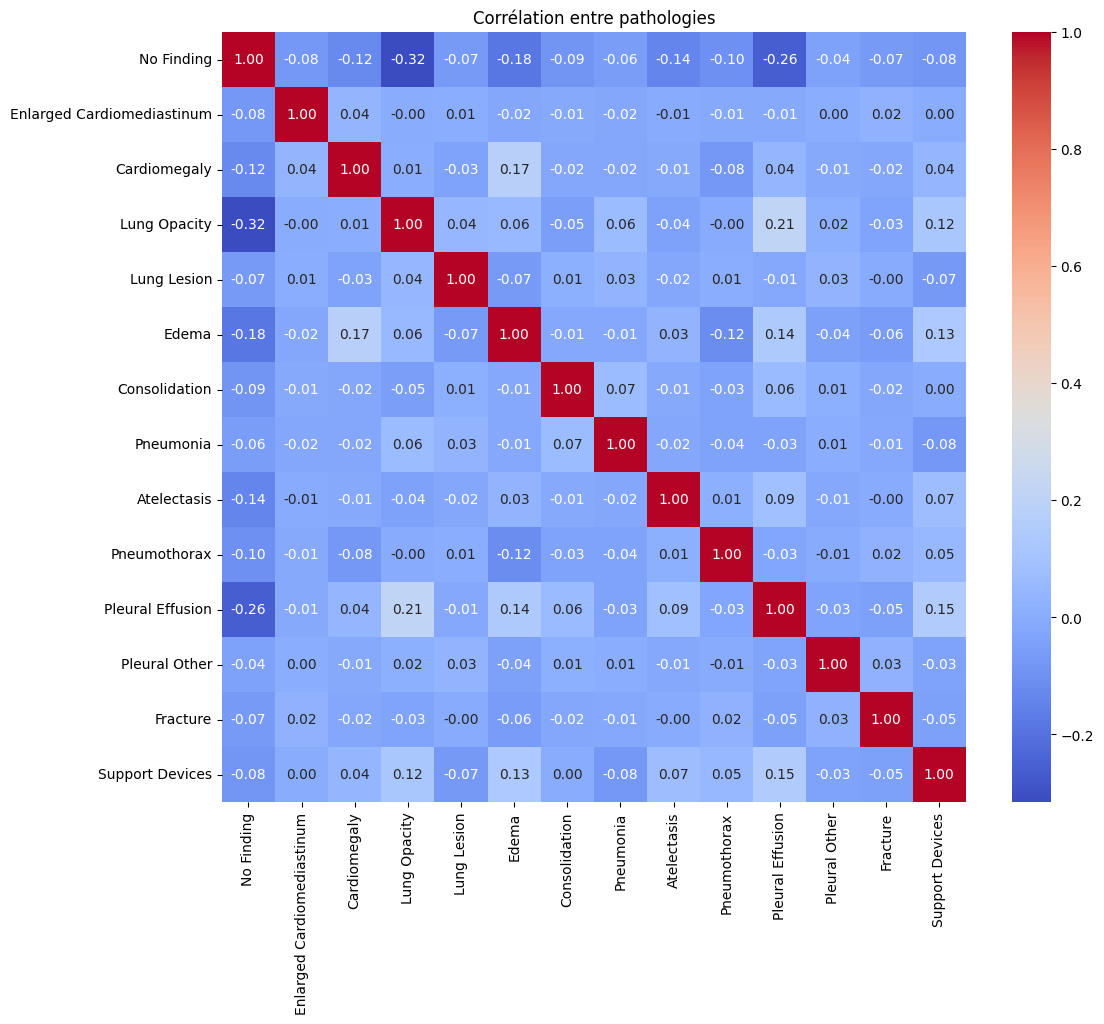

In [8]:
# Matrice de co-occurrence (corrélation binaire)
co_matrix = df[pathology_cols].applymap(lambda x: 1 if x == 1.0 else 0).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(co_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Corrélation entre pathologies")


Text(0.5, 1.0, 'Nombre de pathologies positives par image')

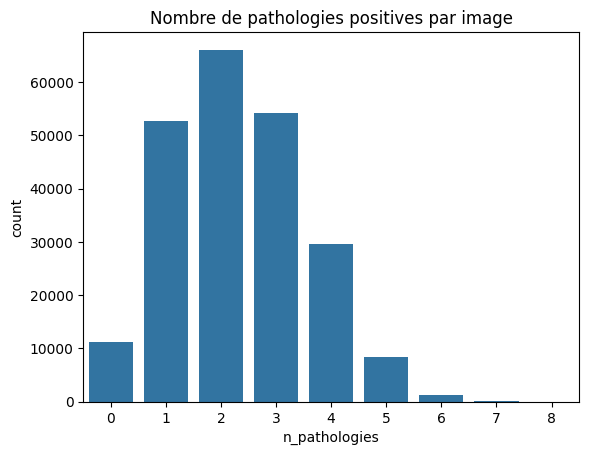

In [9]:
# Nombre de pathologies par image
df['n_pathologies'] = df[pathology_cols].apply(lambda row: sum(row == 1.0), axis=1)

plt.figure()
sns.countplot(x='n_pathologies', data=df)
plt.title("Nombre de pathologies positives par image")


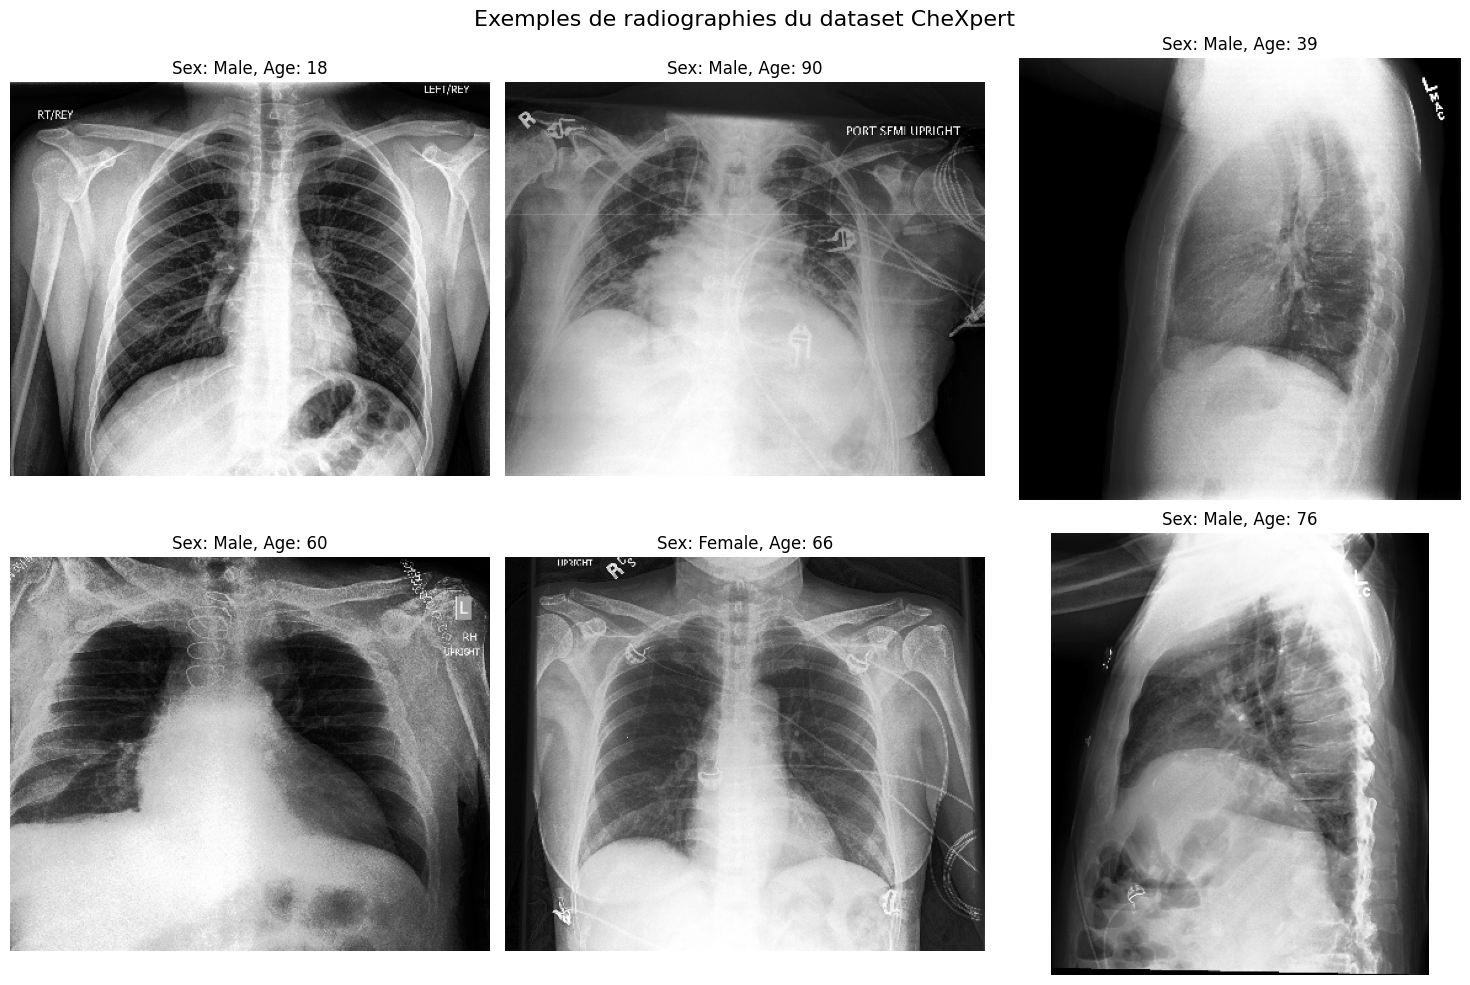

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

# Charger les données
df = pd.read_csv("CheXpert-v1.0-small/train.csv")  # adapte le nom au besoin

# Sélectionner quelques lignes aléatoires
sample_df = df.sample(n=6, random_state=42)

# Créer une grille de visualisation
plt.figure(figsize=(15, 10))

for i, path in enumerate(sample_df['Path']):
    img_path = path  # adapte "chexpert_dataset_root" à ton chemin local
    try:
        img = Image.open(img_path).convert("L")  # Convertir en niveau de gris
        plt.subplot(2, 3, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Sex: {sample_df.iloc[i]['Sex']}, Age: {sample_df.iloc[i]['Age']}")
        plt.axis('off')
    except FileNotFoundError:
        print(f"Fichier non trouvé : {img_path}")

plt.suptitle("Exemples de radiographies du dataset CheXpert", fontsize=16)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd

# Charge le CSV
df = pd.read_csv("CheXpert-v1.0-small/train.csv")

# Liste des colonnes correspondant aux classes
classes = [
    "No Finding",
    "Enlarged Cardiomediastinum",
    "Cardiomegaly",
    "Lung Opacity",
    "Lung Lesion",
    "Edema",
    "Consolidation",
    "Pneumonia",
    "Atelectasis",
    "Pneumothorax",
    "Pleural Effusion",
    "Pleural Other",
    "Fracture",
    "Support Devices"
]

# Compte les 1.0 (présence de la pathologie)
positive_counts = (df[classes] == 1.0).sum().sort_values(ascending=False)

# Affiche le résultat
print("Nombre d'images positives par classe :")
print(positive_counts)


Nombre d'images positives par classe :
Support Devices               116001
Lung Opacity                  105581
Pleural Effusion               86187
Edema                          52246
Atelectasis                    33376
Cardiomegaly                   27000
No Finding                     22381
Pneumothorax                   19448
Consolidation                  14783
Enlarged Cardiomediastinum     10798
Lung Lesion                     9186
Fracture                        9040
Pneumonia                       6039
Pleural Other                   3523
dtype: int64
